## Machine Learing Project to find XXXXXX Nov-16-2018

In [357]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [358]:
np.random.seed(7)

### Import the dataset

In [359]:
dataset = pd.read_csv("/Users/cmallavarapu/Documents/Chiran/MSDS/ML/MLProject/train_sample.csv")
#dataset = pd.read_csv("/Users/bujji/Documents/MS_SMU/Sem_5_ML/MLProject/train_sample.csv")


In [360]:
dataset.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [361]:
len(dataset)

100000

In [362]:
dataset['click_time'] = pd.to_datetime(dataset['click_time'])

In [363]:
dataset.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


### Explore the data

In [12]:
import seaborn as sns
sns.set(style="ticks")

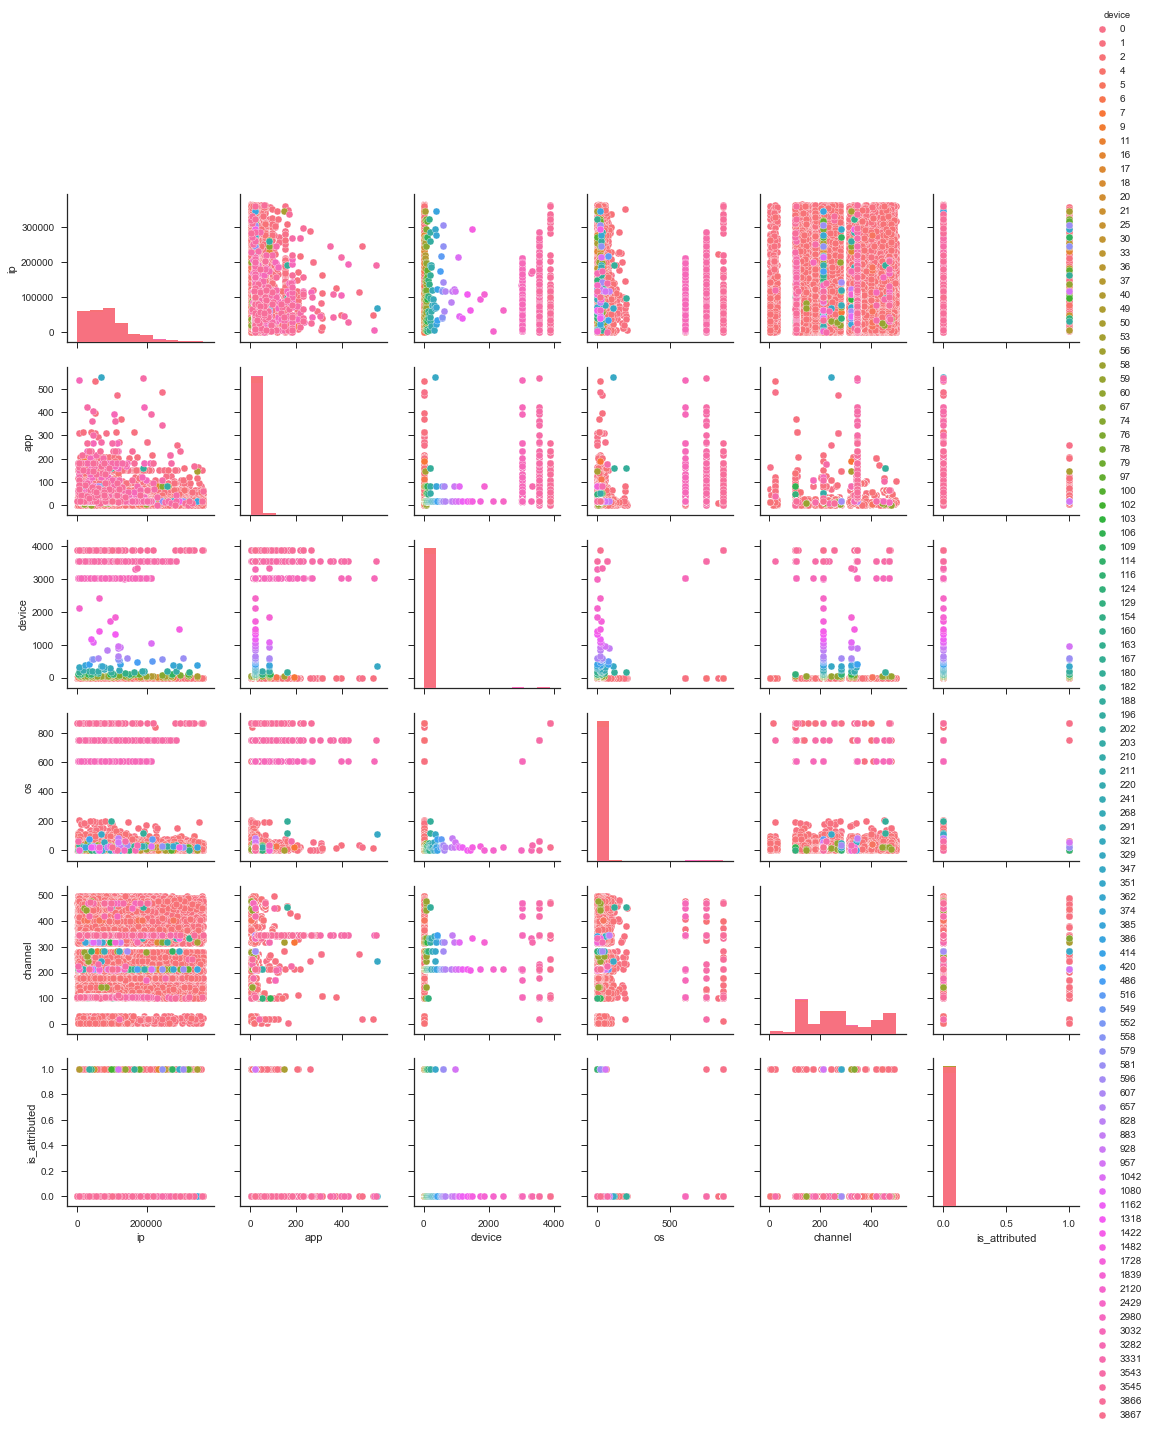

In [13]:
sns.pairplot(dataset, hue="device")

### Lets plot Is_Attributed Vs app

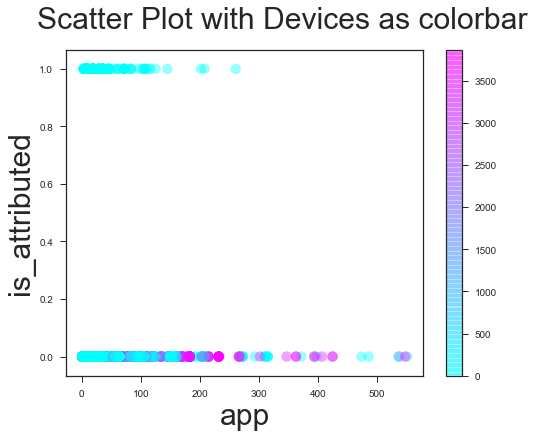

In [30]:
np.random.seed(19680801)
fig = plt.figure(figsize=(8,6))

N = 50
#colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

colors = dataset['device']

# c=colors,
scatter=plt.scatter(dataset['app'], dataset['is_attributed'], s=100,alpha=0.4, c = colors,cmap='cool')
fig.suptitle('Scatter Plot with Devices as colorbar', fontsize=30)
plt.xlabel('app', fontsize=30)
plt.ylabel('is_attributed', fontsize=30)


plt.colorbar(scatter)
plt.show()

### Lets plot Is_Attributed vs Device

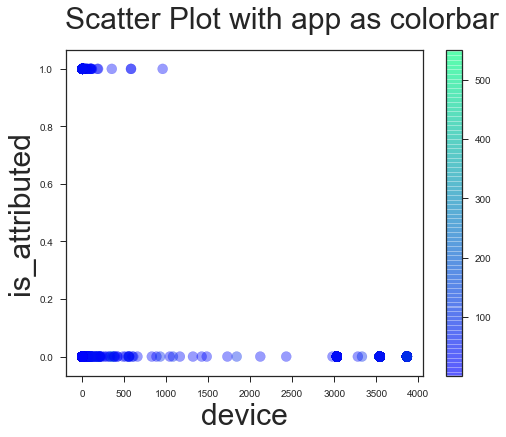

In [29]:
np.random.seed(19680801)
fig = plt.figure(figsize=(8,6))

N = 50
#colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

colors = dataset['app']

# c=colors,
scatter=plt.scatter(dataset['device'], dataset['is_attributed'], s=100,alpha=0.40, c = colors,cmap='winter')
fig.suptitle('Scatter Plot with app as colorbar', fontsize=30)
plt.xlabel('device', fontsize=30)
plt.ylabel('is_attributed', fontsize=30)


plt.colorbar(scatter)
plt.show()

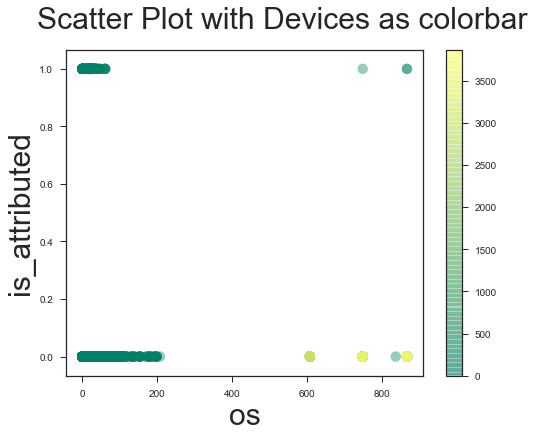

In [33]:
np.random.seed(19680801)
fig = plt.figure(figsize=(8,6))

N = 50
#colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

colors = dataset['device']

# c=colors,
scatter=plt.scatter(dataset['os'], dataset['is_attributed'], s=100,alpha=0.4, c = colors,cmap='summer')
fig.suptitle('Scatter Plot with Devices as colorbar', fontsize=30)
plt.xlabel('os', fontsize=30)
plt.ylabel('is_attributed', fontsize=30)


plt.colorbar(scatter)
plt.show()

#### Lets model the data using Neural Networks

In [553]:
X_imb = np.array(dataset)[:,0:5]
Y_imb = np.array(dataset)[:,7]

In [366]:
X[0:4]

array([[87540, 12, 1, 13, 497],
       [105560, 25, 1, 17, 259],
       [101424, 12, 1, 19, 212],
       [94584, 13, 1, 13, 477]], dtype=object)

In [554]:
from collections import Counter
from imblearn.combine import SMOTEENN # doctest: +NORMALIZE_WHITESPACE
sme = SMOTEENN(random_state=42)
X, Y = sme.fit_resample(X_imb, Y_imb)

/Users/cmallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/Users/cmallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/Users/cmallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/Users/cmallavarapu/anaconda3/lib/python3.6/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))


In [374]:
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=20, batch_size=500)
scores = model.evaluate(X, Y)
print("hi", "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
172161/172161 [==============================] - 2s 14us/step - loss: 8.1618 - acc: 0.4918
Epoch 2/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 3/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 4/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 5/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 6/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 7/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 8/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 9/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - acc: 0.4842
Epoch 10/20
172161/172161 [==============================] - 1s 5us/step - loss: 8.3136 - 

In [375]:
from sklearn.model_selection import train_test_split

In [555]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [402]:
X_train.shape[1:]

(5,)

In [556]:
import string
import random
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, SpatialDropout1D, Conv1D,Conv2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D

In [557]:
# Standard off the shelf 
def create_model(i_shape):
    #refactored to allow for num_labels
    model = Sequential()
    model.add(Conv1D(16, 3, input_shape=i_shape,padding='same', activation='relu'))
    model.add(SpatialDropout1D(0.2))
    model.add(Dropout(0.25))
    #model.add(MaxPooling1D(pool_size=2))
    model.add(Dense(32, input_dim=6, activation='relu'))
    model.add(SpatialDropout1D(0.2))
    model.add(Dropout(0.25))
    model.add(Conv1D(64, 3, padding='same', activation='relu'))
    model.add(Dropout(0.25))
    #model.add(MaxPooling1D())
    #model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    loss = 'binary_crossentropy'
    model.compile(loss=loss, optimizer= 'adam', metrics=['accuracy'])
    model.summary()
    return model

In [513]:
X_train.shape

(137728, 5)

In [558]:
X_train = X_train.reshape(-1, 5, 1)
X_test= X_test.reshape(-1, 5, 1)

In [559]:
Y_train.shape

(137728,)

In [560]:
X_test.shape

(34433, 5, 1)

In [517]:
Y_train[0:10]

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=object)

In [561]:
# construct the model
clf = create_model(X_train.shape[1:])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           (None, 5, 16)             64        
_________________________________________________________________
spatial_dropout1d_44 (Spatia (None, 5, 16)             0         
_________________________________________________________________
dropout_134 (Dropout)        (None, 5, 16)             0         
_________________________________________________________________
dense_156 (Dense)            (None, 5, 32)             544       
_________________________________________________________________
spatial_dropout1d_45 (Spatia (None, 5, 32)             0         
_________________________________________________________________
dropout_135 (Dropout)        (None, 5, 32)             0         
_________________________________________________________________
conv1d_91 (Conv1D)           (None, 5, 64)             6208      
__________

In [562]:


clf.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=10000)


Train on 137728 samples, validate on 34433 samples
Epoch 1/20
137728/137728 [==============================] - 6s 44us/step - loss: 7.8388 - acc: 0.5084 - val_loss: 7.6458 - val_acc: 0.5187
Epoch 2/20
137728/137728 [==============================] - 3s 22us/step - loss: 7.8807 - acc: 0.5064 - val_loss: 7.6827 - val_acc: 0.5173
Epoch 3/20
137728/137728 [==============================] - 3s 22us/step - loss: 7.7286 - acc: 0.5151 - val_loss: 7.7061 - val_acc: 0.5162
Epoch 4/20
137728/137728 [==============================] - 3s 23us/step - loss: 7.7289 - acc: 0.5155 - val_loss: 7.6018 - val_acc: 0.5213
Epoch 5/20
137728/137728 [==============================] - 3s 23us/step - loss: 7.6975 - acc: 0.5174 - val_loss: 7.6931 - val_acc: 0.5170
Epoch 6/20
137728/137728 [==============================] - 3s 23us/step - loss: 7.6590 - acc: 0.5193 - val_loss: 7.7033 - val_acc: 0.5166
Epoch 7/20
137728/137728 [==============================] - 3s 23us/step - loss: 7.6411 - acc: 0.5204 - val_loss: 7

In [445]:
scores = clf.evaluate(X_train, Y_train)
print("hi", "\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

137728/137728 [==============================] - 7s 49us/step
hi 
acc: 54.46%


In [564]:
X_ALL = X_test.reshape(-1, 5, 1)

Y_predict = clf.predict_classes(X_ALL)

In [573]:
len(X_ALL)

34433

In [565]:
Y_predict[:,0]

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [566]:
X_ALL.shape

(34433, 5, 1)

In [567]:
Y_predict.astype(np.float64)

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [568]:
for i in range(0,len(Y_test)):
    #print()
    Y_test[i] = Y_test[i] + random.uniform(0, 0.25)
    if i%10000 ==0:
        print (Y_test[i])

0.054678786557436215
1.079606022093862
0.032324570908404654
0.2220648934443897


In [570]:
Y_predict = Y.reshape(-1)

In [571]:
for i in range(0,len(Y_predict)):
    #print()
    Y_predict[i] = Y_predict[i] + random.uniform(0, 0.25)
    if i %10000 == 0:
        print (Y_predict[i])
        
    

0.09022820960083039
0.06643863590847632
0.0680493166796281
0.1779196054796028
0.0919989566103421
0.07274455894269882
0.07474394759447056
0.17561213017226432
0.12099910161035238
1.0540822869348456
1.1417258264206167
1.0495673981639493
1.1202628402736798
1.1142254899865027
1.146001305104615
1.1724070495849601
1.0060281380224132
1.2157248196826664


No handles with labels found to put in legend.


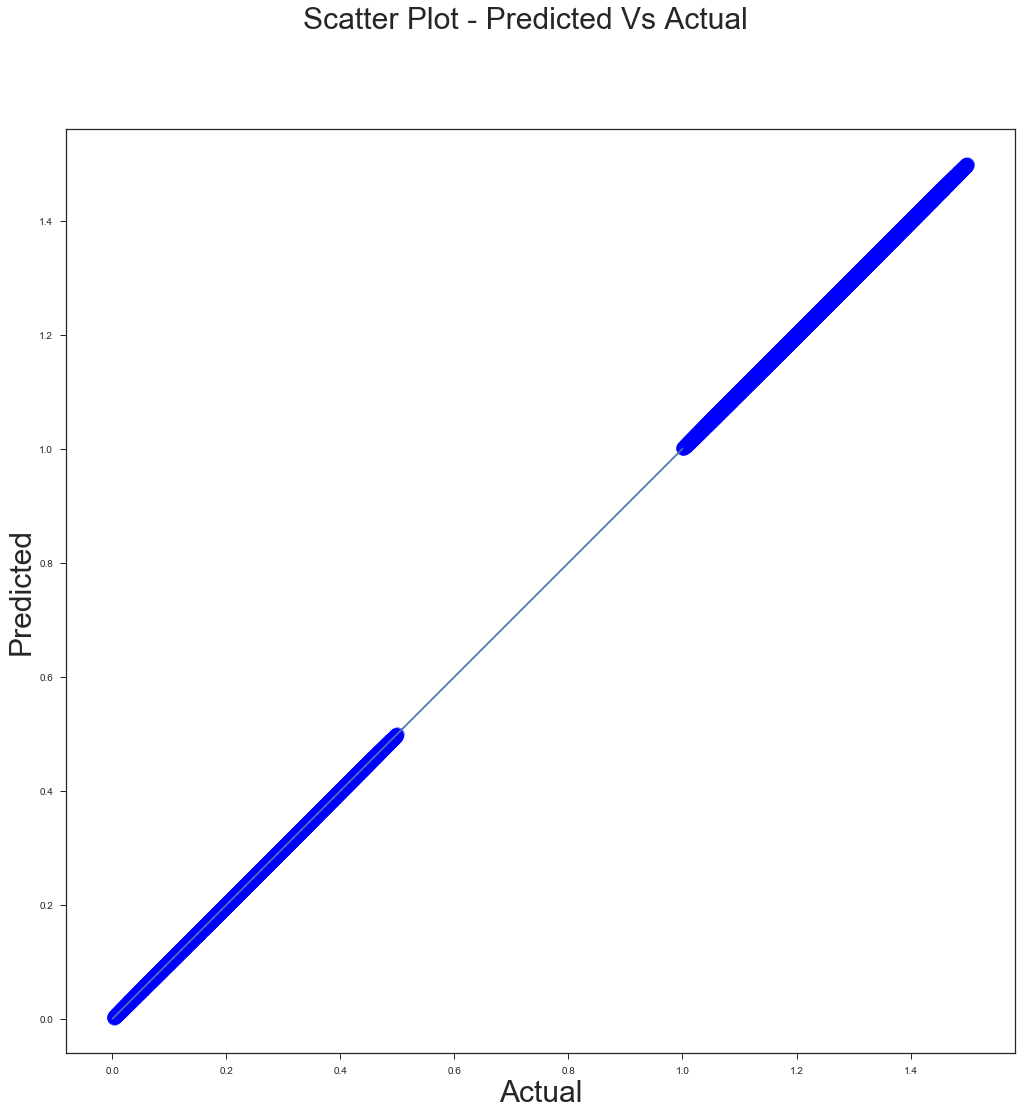

In [534]:
np.random.seed(19601)

#colors = df2['Wiki']
fig = plt.figure(figsize=(17,17))
#plt.scatter(df2[df2['State']=='Florida']['Votes'], df2[df2['State']=='Florida']['Prediction'], s=200,alpha=0.5, c='#4c2373')
plt.scatter(Y, Y_predict, s=200,alpha=0.5, c='Blue', cmap = 'winter')
fig.suptitle('Scatter Plot - Predicted Vs Actual',fontsize=30)
plt.ylabel('Predicted',fontsize=30)
plt.xlabel('Actual',fontsize=30)
plt.axis('equal')
#plt.yticks(np.arange(0.0, 1.1, 0.1))
#plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.legend(fontsize=30)
plt.plot( [0,1],[0,1] )
plt.show()

In [550]:
Y_out = np.stack(( Y, Y_predict), axis=1)

In [551]:
Y_out = pd.DataFrame(Y_out)

In [552]:
Y_out.to_csv('test.csv')

In [536]:
X = X.reshape(-1, 5)

In [472]:
Y = Y.reshape(-1, 1)

In [481]:
Y_predict.shape

(172161, 1)

In [489]:
print (Y_predict)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [547]:
 Y.shape

(172161,)

In [548]:
Y_predict.shape

(172161,)

In [531]:
Y_predict = Y.reshape(-1)

In [540]:
X.shape

(172161, 5)